In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Data

In [2]:
df = pd.read_csv('../data/data_visual.csv',sep=',')
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_group,contact_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no,employee,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no,employee,unknown


# Detailed Column Description

**Bank client data:**
<br>
1. `age` (numeric)
2. `job` : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3. `marital` : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. `education` (categorical: "unknown","secondary","primary","tertiary")
5. `default`: has credit in default? (binary: "yes","no")
6. `balance`: average yearly balance, in euros (numeric)
7. `housing`: has housing loan? (binary: "yes","no")
8. `loan`: has personal loan? (binary: "yes","no")
<br>
**Related with the last contact of the current campaign:**
<br>
1. `contact`: contact communication type (categorical: "unknown","telephone","cellular")
2. `day`: last contact day of the month (numeric)
3. `month`: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
4. `duration`: last contact duration, in seconds (numeric)
<br>
**Other attributes:**
1. `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
2. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
3. `previous`: number of contacts performed before this campaign and for this client (numeric)
4. `poutcome`: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
<br>
**Output variable (desired target):**<br>
`y` - has the client subscribed a term deposit? (binary: "yes","no")

In [3]:
df['y_num'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [4]:
list_balgroup = []

for i, x in df.iterrows():
    if x['balance'] <=0 :
        balgroup = '<=0'
    elif x['balance'] >0 and x['balance'] <= 500 :
        balgroup = '>0-500'    
    elif x['balance'] >500 and x['balance'] <= 1000 :
        balgroup = '>500-1000'    
    elif x['balance'] >1000 and x['balance'] <= 1500 :
        balgroup = '>1000-1500'    
    elif x['balance'] >1500 and x['balance'] <= 2000 :
        balgroup = '>1500-2000'    
    elif x['balance'] >2000   :
        balgroup = '>2000'
    else:
        balgroup = 'unknown'
    list_balgroup.append(balgroup)

df['balgroup'] = list_balgroup

In [5]:
list_balgroup2 = []

for i, x in df.iterrows():
    if x['balance'] >2000 and x['balance'] <= 4000 :
        balgroup = '>2000-4000'
    elif x['balance'] >4000 and x['balance'] <= 6000 :
        balgroup = '>4000-6000'    
    elif x['balance'] >6000 and x['balance'] <= 8000 :
        balgroup = '>6000-8000'    
    elif x['balance'] >8000 and x['balance'] <= 1000 :
        balgroup = '>8000-10000'    
    elif x['balance'] >10000  :
        balgroup = '>10000' 
    else:
        balgroup = 'unknown'
    list_balgroup2.append(balgroup)

df['balgroup2'] = list_balgroup2

In [ ]:
list_agegroup = []

for i, x in df.iterrows():
    if x['age'] >= 18 and x['age'] <= 33:
        agegroup = '18 - 33'
    elif x['age'] >= 34 and x['age'] <= 49:
        agegroup = '34 - 49'
    elif x['age'] >= 50 and x['age'] <= 65:
        agegroup = '50 - 65'
    elif x['age'] >= 66 and x['age'] <= 81:
        agegroup = '66 - 81'      
    elif x['age'] >= 82 and x['age'] <= 97:
        agegroup = '82 - 97'

    list_agegroup.append(agegroup)

df['age_group'] = list_agegroup

# EDA

## Numerical Data

In [ ]:
num_dtypes = ['int16','int32','int64','float16','float32','float64']

num_df = df.select_dtypes(include=num_dtypes)
numericals = num_df.columns

print(numericals)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y_num'],
      dtype='object')


In [ ]:
num_df.describe()

,age,balance,day,duration,campaign,pdays,previous,y_num
count,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000
mean,40.936469,1362.331483,15.806220,4.302552,2.763881,40.171349,0.580012,0.116954
std,10.618553,3044.904583,8.322483,4.291986,3.098164,100.087799,2.303257,0.321368
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,1.716667,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,5.316667,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,81.966667,63.000000,871.000000,275.000000,1.000000


## Outlier (Distribution of the numerical data)

Almost all numerical data are not normally distributed. Removing outliers from this data is quite risky because of the large amount of it.

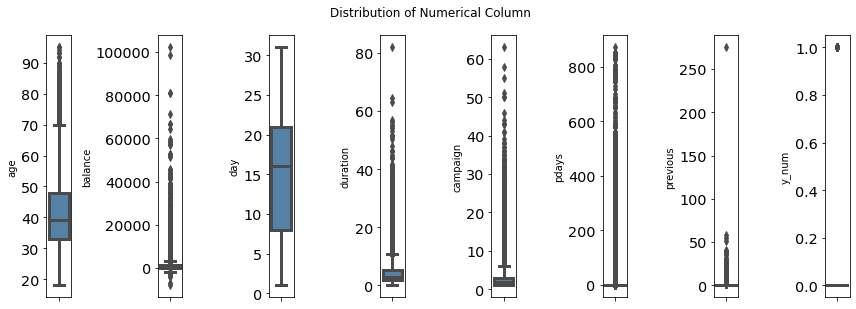

In [ ]:
num_dtypes = ['int16','int32','int64','float16','float32','float64']
num_df = df.select_dtypes(include=num_dtypes)
numericals = num_df.columns

for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='steelblue', orient='v')
    plt.tight_layout()


plt.title('Distribution of Numerical Column', x=-16, y=1.05);

## Categorical Data

In [ ]:
cat_dtypes = ['object']

cat_df = df.select_dtypes(include=cat_dtypes)
categoricals = cat_df.columns

print(categoricals)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y', 'job_group', 'contact_group', 'balgroup',
       'balgroup2', 'age_group'],
      dtype='object')


In [ ]:
cat_df.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,job_group,contact_group,balgroup,balgroup2,age_group
count,45206,45206,45206,45206,45206,45206,45206,45206,45206,45206,45206,45206,45206,45206,45206
unique,12,3,3,2,2,2,3,12,4,2,6,2,6,5,5
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no,employee,phone,>0-500,unknown,34 - 49
freq,9732,27211,25056,44391,25128,37964,29280,13766,36954,39919,26664,32186,16381,37156,21932


## Target (Conversion Rate of Campaign)

Target `y` represents the number of customers who opened deposit accounts (conversion rate). Conversion rate of this campaign is around 12%.

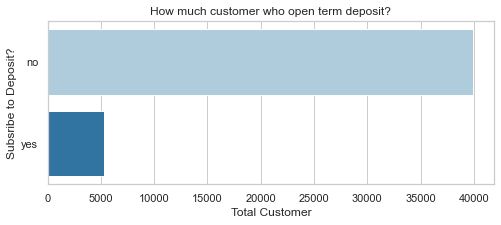

In [ ]:
sns.set(rc={'figure.figsize':(8,3)}, font_scale=1, style='whitegrid')
sns.countplot(data=df, y='y', palette='Paired')
plt.xlabel("Total Customer")
plt.ylabel("Subsribe to Deposit?")
plt.title('How much customer who open term deposit?');

## Customer Personal Data

### Age

Customers are dominated by people who are in their productive age, around 30-50. The number of customers who open deposit accounts for ages between 18 and 50 is not too far off, with most customers being in their 30-50.

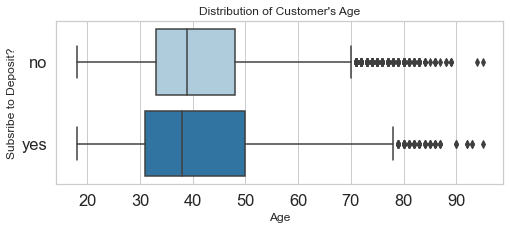

In [ ]:
sns.set(rc={'figure.figsize':(8,3)}, font_scale=1.5, style='whitegrid')
sns.boxplot(data=df, x="age", y="y", order = df["y"].value_counts().index, palette='Paired')
plt.xlabel("Age", fontsize = 12)
plt.ylabel("Subsribe to Deposit?", fontsize = 12)
plt.title('Distribution of Customer\'s Age', fontsize=12);

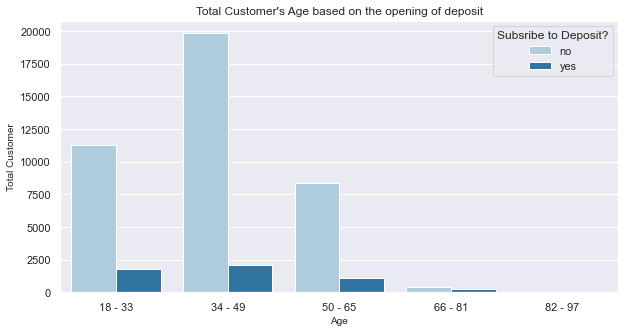

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
job = sns.countplot(x="age_group", data = df, hue = "y", palette='Paired', order = ['18 - 33', '34 - 49', '50 - 65','66 - 81', '82 - 97'])
plt.title('Total Customer\'s Age based on the opening of deposit')
plt.xlabel("Age", fontsize = 10)
plt.ylabel("Total Customer", fontsize = 10)
plt.legend(title='Subsribe to Deposit?');

### Job Group

Based on the proportion, customers who do not have an active income, such as 'student', 'retired' and 'unemployed', are more likely to open a deposit account. However, the number of those customers tends to be small compared to the number of customers who have active income. The highest number of customers who have active income and open deposit accounts are those who have jobs as 'employee'

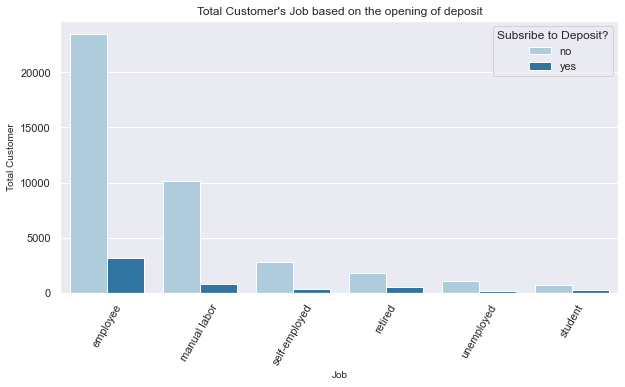

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
job = sns.countplot(x="job_group", data = df, hue = "y", order = df["job_group"].value_counts().index, palette="Paired")
job.tick_params(axis='x', rotation=60)
plt.title('Total Customer\'s Job based on the opening of deposit')
plt.xlabel("Job", fontsize = 10)
plt.ylabel("Total Customer", fontsize = 10)
plt.legend(title='Subsribe to Deposit?');

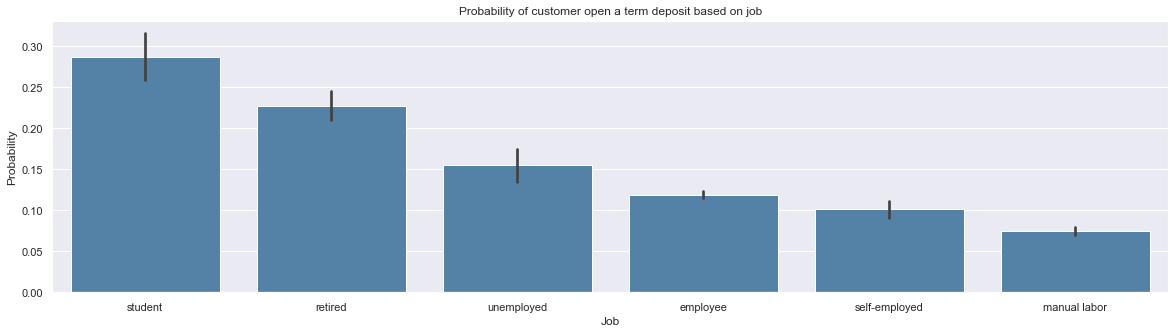

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
plt.figure( figsize = (20, 5))
sns.barplot(data = df, x = 'job_group', y = 'y_num', color='steelblue', order=['student', 'retired', 'unemployed', 'employee', 'self-employed', 'manual labor'])
plt.xlabel("Job", fontsize = 12)
plt.ylabel("Probability", fontsize = 12)
plt.title('Probability of customer open a term deposit based on job');

### Marital

Customers who have dependents tend to not open an account but the greatest number of customers is who have dependents/married.

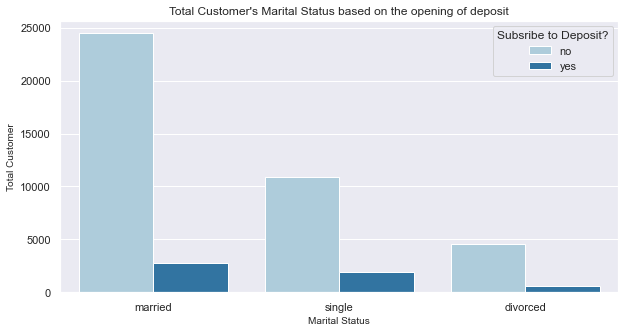

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
marital = sns.countplot(x="marital", data = df, hue = "y", order = df["marital"].value_counts().index, palette="Paired")
plt.title('Total Customer\'s Marital Status based on the opening of deposit')
plt.xlabel("Marital Status", fontsize = 10)
plt.ylabel("Total Customer", fontsize = 10)
plt.legend(title='Subsribe to Deposit?');

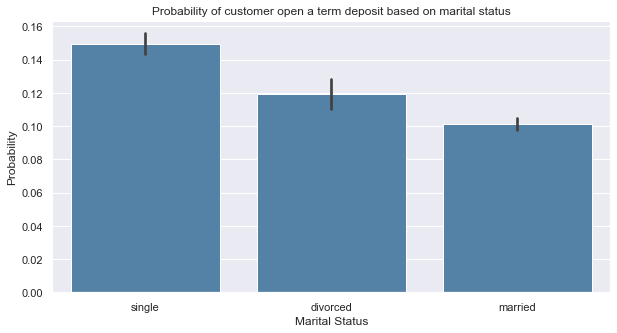

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
sns.barplot(data = df, x = 'marital', y = 'y_num', color='steelblue', order=['single', 'divorced', 'married'])
plt.xlabel("Marital Status", fontsize = 12)
plt.ylabel("Probability", fontsize = 12)
plt.title('Probability of customer open a term deposit based on marital status');

### Education

Customers with `education` 'secondary' and 'tertiary' have the same numbers of opening deposit account, with 'tertiary' have higher conversion rate.

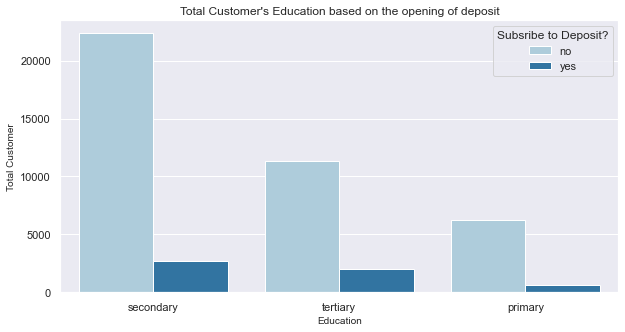

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
sns.countplot(x="education", data = df, hue = "y", order = df["education"].value_counts().index, palette="Paired")
plt.title('Total Customer\'s Education based on the opening of deposit')
plt.xlabel("Education", fontsize = 10)
plt.ylabel("Total Customer", fontsize = 10)
plt.legend(title='Subsribe to Deposit?');

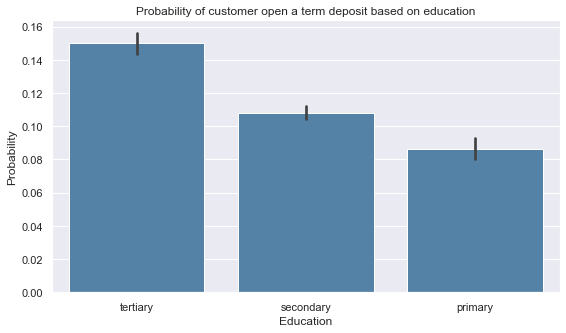

In [ ]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'education', y = 'y_num', color='steelblue')
plt.xlabel("Education", fontsize = 12)
plt.ylabel("Probability", fontsize = 12)
plt.title('Probability of customer open a term deposit based on education');

## Customer Bank Transaction Data

### Loan - Default - Housing

`loan`, `default`, and `housing` are features that describe the condition of customer's debt to the bank. From these three features, it shows that customers who do not have a `default`, `housing`, or `loan` tend to open a deposit account.

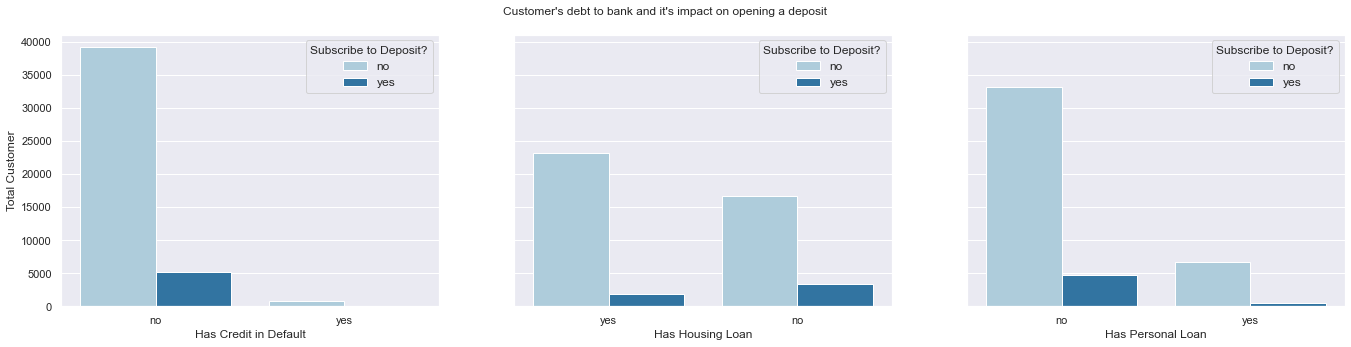

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(23, 5), sharey=True)

sns.countplot(data=df, x='default', hue='y', ax = ax[0], palette='Paired')
ax[0].set_xlabel("Has Credit in Default", fontsize = 12)
ax[0].set_ylabel("Total Customer", fontsize = 12)
ax[0].legend(title="Subscribe to Deposit?", fontsize = 12)

sns.countplot(data=df, x = 'housing', hue = 'y', ax = ax[1], palette='Paired')
plt.title('Customer\'s debt to bank and it\'s impact on opening a deposit', x=-0.8, y=1.05)
ax[1].set_xlabel("Has Housing Loan", fontsize = 12)
ax[1].set_ylabel("", fontsize = 12)
ax[1].legend(title="Subscribe to Deposit?", fontsize = 12)

sns.countplot(data=df, x = 'loan', hue = 'y', ax = ax[2], palette='Paired')
ax[2].set_xlabel("Has Personal Loan", fontsize = 12)
ax[2].set_ylabel("", fontsize = 12)
ax[2].legend(title="Subscribe to Deposit?", fontsize = 12);

### Balance

Customers are most widely spread in the range of balance from 0 to approximately 1500. To better see the distribution of customers, the data will be broken down into data with a balance of -2000 to 2000, less than -2000, and more than 2000.

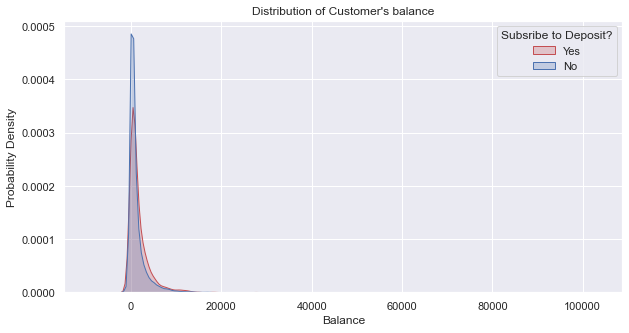

In [ ]:
sns.kdeplot(df.loc[(df['y']=='yes'),'balance'], color='r', shade=True, label='Yes')
sns.kdeplot(df.loc[(df['y']=='no'),'balance'], color='b', shade=True, label='No')
  
plt.xlabel('Balance')
plt.ylabel('Probability Density')
plt.title('Distribution of Customer\'s balance')
plt.legend(title='Subsribe to Deposit?');

In [ ]:
dfbal2000 = df.loc[(df['balance']>-2000) & (df['balance']<2000)]
dfbal2000.describe()['balance']

count    36687.000000
mean       433.760297
std        559.866427
min      -1980.000000
25%         25.000000
50%        281.000000
75%        731.000000
max       1998.000000
Name: balance, dtype: float64

With the total around 36000, customers who have balance between -2000 to 2000 have the most in number. Customer mostly have balance around 0 to 500. The greater the balance, the less number of customers who have it, except for minus balance. The percentage for each range of balance slightly didn't differ to much.

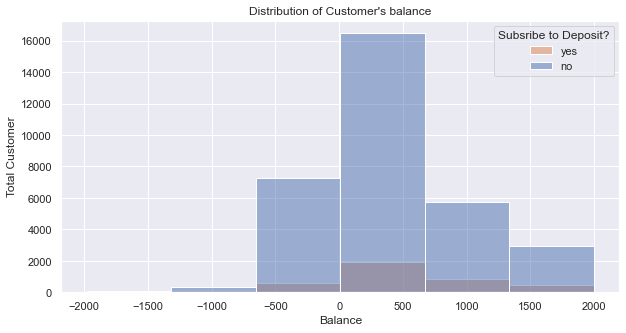

In [ ]:
ax = sns.histplot(dfbal2000, x="balance", bins=6, hue='y')
plt.xlabel('Balance')
plt.ylabel('Total Customer')
plt.title('Distribution of Customer\'s balance')
ax.legend(labels=['yes','no'], title='Subsribe to Deposit?');

The greater the balance, the greater the probability of customer to open a deposit.

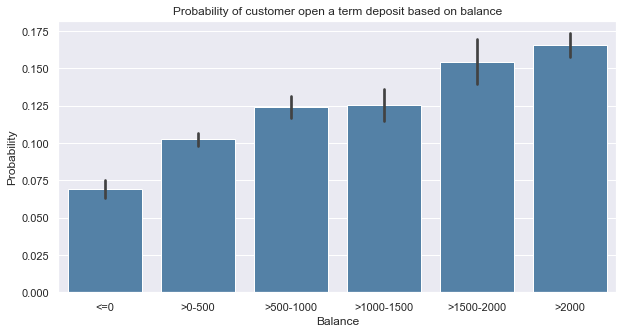

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
sns.barplot(data = df, x = 'balgroup', y = 'y_num', color='steelblue', order=['<=0', '>0-500', '>500-1000', '>1000-1500', '>1500-2000', '>2000'])
plt.xlabel("Balance", fontsize = 12)
plt.ylabel("Probability", fontsize = 12)
plt.title('Probability of customer open a term deposit based on balance');

In [ ]:
dfbalmin = df.loc[(df['balance']<-2000)]
dfbalmin.describe()['balance']

count      14.000000
mean    -3388.357143
std      1826.326898
min     -8019.000000
25%     -3357.250000
50%     -2769.500000
75%     -2162.000000
max     -2049.000000
Name: balance, dtype: float64

In [ ]:
dfbalmin.loc[(dfbalmin['housing']=='no')&(dfbalmin['loan']=='no')&(dfbalmin['default']=='no')]

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,job_group,contact_group,y_num,balgroup,balgroup2,age_group


All customer who have balance under -2000 have loan, either personal loan or housing loan, or have credit in default. The number of customer in this category is very small, only 14, and all customer is not opening a deposit account except 1 customer with balance -3058.

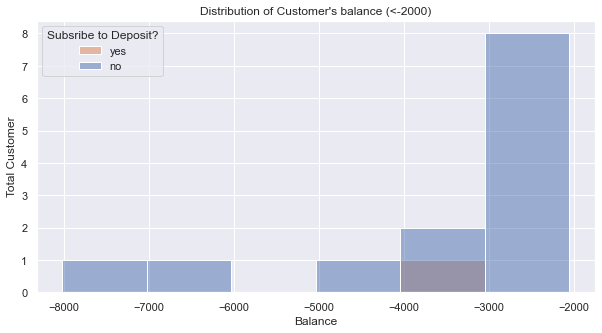

In [ ]:
ax=sns.histplot(dfbalmin, x="balance", bins=6, hue='y')
plt.xlabel('Balance')
plt.ylabel('Total Customer')
plt.title('Distribution of Customer\'s balance (<-2000)')
ax.legend(labels=['yes','no'], title='Subsribe to Deposit?');

In [ ]:
dfbalmin.loc[(dfbalmin['balance']>-4000)&(dfbalmin['balance']<-3000)&(dfbalmin['y']=='yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,job_group,contact_group,y_num,balgroup,balgroup2,age_group
32713,39,self-employed,married,tertiary,no,-3058,yes,yes,cellular,17,...,-1,0,unknown,yes,self-employed,phone,1,<=0,unknown,34 - 49


In [ ]:
dfhuge = df.loc[(df['balance']>2000)&(df['balance']<10500)]
dfhuge.describe()['balance']

count     7756.000000
mean      4169.324910
std       1986.901903
min       2001.000000
25%       2607.000000
50%       3517.000000
75%       5171.250000
max      10483.000000
Name: balance, dtype: float64

Customer who have balance more than 2000 is around 7700 out of 45000. The greatest the balance, the fewer customer have it and the less customer open the deposit account. But the difference between each category of balance on opening the deposit is only slightless. 

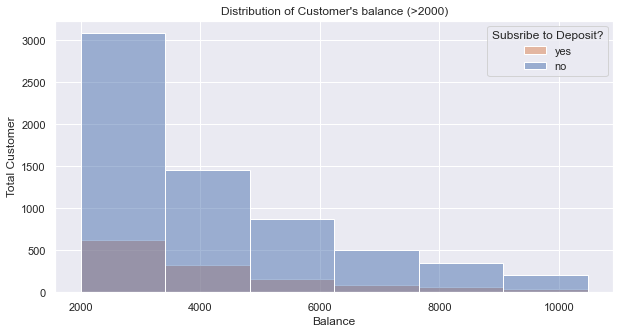

In [ ]:
ax = sns.histplot(dfhuge, x="balance", bins=6, hue="y")
plt.xlabel('Balance')
plt.ylabel('Total Customer')
plt.title('Distribution of Customer\'s balance (>2000)')
ax.legend(labels=['yes','no'], title='Subsribe to Deposit?');

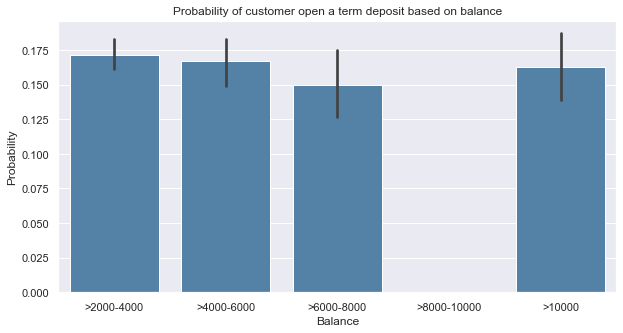

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
sns.barplot(data = df, x = 'balgroup2', y = 'y_num', color='steelblue', order=['>2000-4000', '>4000-6000', '>6000-8000', '>8000-10000', '>10000'])
plt.xlabel("Balance", fontsize = 12)
plt.ylabel("Probability", fontsize = 12)
plt.title('Probability of customer open a term deposit based on balance');

## Customer Contact Campaign

### Contact

Customers that have been contacted personally with team marketing tend to open a deposit account. Customer that have been contacted with 'cellular' have more in numbers because it is easier to contact people by phone cellular than telephone. When viewed from the proportion between those who open and not open accounts from customers with `contact` 'cellular' and 'telephone', the number between the two is not different. Thus, it can be said that, whether customers are contacted with 'cellular' or 'telephone' did not have any impact on the conversion rate.

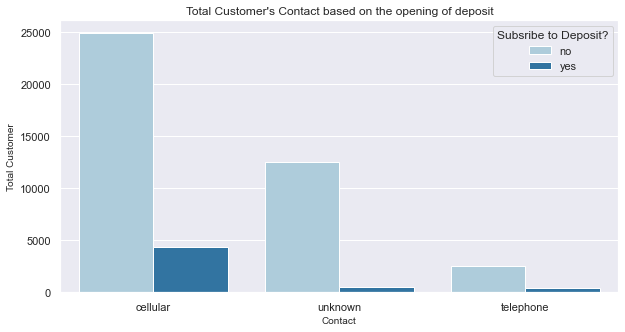

In [ ]:
sns.countplot(data=df, x='contact', hue = 'y', palette='Paired', order = df["contact"].value_counts().index)
plt.xlabel("Contact", fontsize = 10)
plt.ylabel("Total Customer", fontsize = 10)
plt.legend(title='Subsribe to Deposit?')
plt.title('Total Customer\'s Contact based on the opening of deposit');

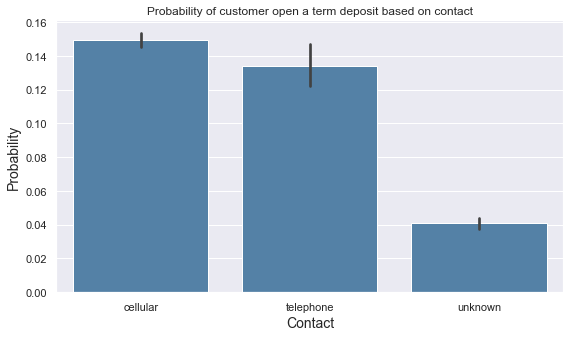

In [ ]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'contact', y = 'y_num', color='steelblue', order=['cellular', 'telephone', 'unknown'])
plt.xlabel("Contact", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.title('Probability of customer open a term deposit based on contact');

### Duration

A call last mostly less than 20 minutes, so data will be broken down from minutes 0 to minutes 15.

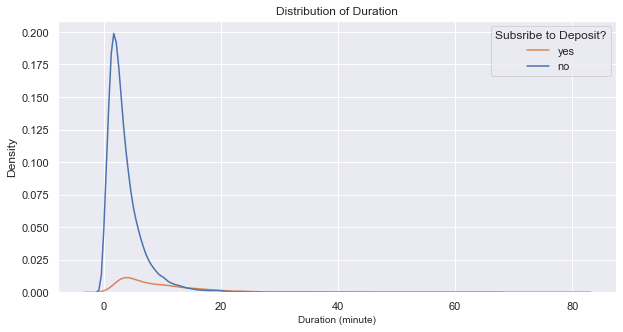

In [ ]:
ax = sns.kdeplot(data=df, x='duration', hue='y')
plt.title('Distribution of Duration')
plt.xlabel('Duration (minute)',fontsize=10)
ax.legend(labels=['yes','no'], title='Subsribe to Deposit?');

In [ ]:
df_duration = df.loc[(df['duration']>0) & (df['duration']<15)]

Most customers tend to not open a deposit account if a call lasts only for a maximum of 1 minute. But from a second minute, customers are more likely interested in the campaign and open a deposit account.

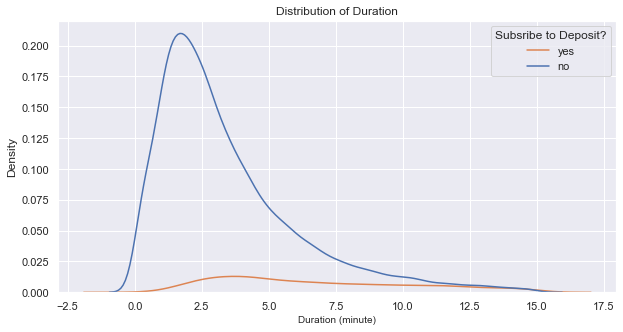

In [ ]:
ax = sns.kdeplot(data=df_duration, x='duration', hue='y')

plt.title('Distribution of Duration')
plt.xlabel('Duration (minute)',fontsize=10)
ax.legend(labels=['yes','no'], title='Subsribe to Deposit?');

### Month

The number of customers who open a deposit account is increasing in the middle of the year, but the number is not much different, except in March, September, and October. In those 3 months, campaign activity seems to be low too than any other month between February until November. January and December have the lowest number of customers who open a deposit, it can be assumed that around that time people are more likely on holiday. There is also a high number of campaign happen in May but return in more number of customer to not open a deposit account.

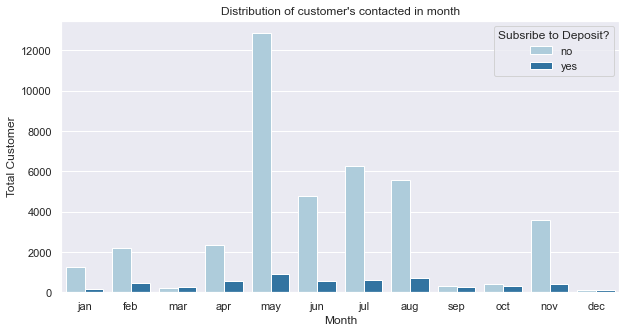

In [ ]:
order_month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.countplot(data = df, x = 'month', hue = 'y', order = order_month, palette='Paired')
plt.xlabel('Month')
plt.ylabel('Total Customer')
plt.title('Distribution of customer\'s contacted in month')
plt.legend( title='Subsribe to Deposit?');

### Day

In [ ]:
df_md = df.copy()

def day_month(x):
    if x <= 10:
        group = 'beginning'
    elif x <= 20:
        group = 'middle'
    else:
        group = 'end'
    return group

df_md['day_month']=df_md.apply(lambda x: day_month(x['day']),axis=1)

df_md = df_md.groupby(['month', 'day_month', 'y'])['job'].count().reset_index()
df_md.columns = ['month', 'day_month', 'y', 'count']

In [ ]:
def no_month(x):
    if x == 'jan':
        no_ = 1
    elif x == 'feb':
        no_ = 2
    elif x == 'mar':
        no_ = 3
    elif x == 'apr':
        no_ = 4
    elif x == 'may':
        no_ = 5
    elif x == 'jun':
        no_ = 6
    elif x == 'jul':
        no_ = 7
    elif x == 'aug':
        no_ = 8
    elif x == 'sep':
        no_ = 9
    elif x == 'oct':
        no_ = 10
    elif x == 'nov':
        no_ = 11
    else:
        no_ = 'dec'
    return no_

def no_day(x):
    if x == 'beginning':
        no_ = 1
    elif x == 'middle':
        no_ = 2
    else:
        no_ = 3
    return no_

df_md['month_no']=df_md.apply(lambda x: no_month(x['month']),axis=1)
df_md['day_no']=df_md.apply(lambda x: no_day(x['day_month']),axis=1)

df_sorted = df_md.sort_values( ['month_no', 'day_no'] , ascending=True).reset_index()
df_sorted.drop('index', axis=1, inplace=True)
df_sorted['day_of_month']=df_sorted.apply(lambda x: x['month'] + ' ' + x['day_month'],axis=1)
df_sorted

,month,day_month,y,count,month_no,day_no,day_of_month
0,jan,beginning,no,8,1,1,jan beginning
1,jan,beginning,yes,3,1,1,jan beginning
2,jan,middle,no,49,1,2,jan middle
3,jan,middle,yes,55,1,2,jan middle
4,jan,end,no,1204,1,3,jan end
...,...,...,...,...,...,...,...
67,dec,beginning,yes,46,dec,1,dec beginning
68,dec,middle,no,28,dec,2,dec middle
69,dec,middle,yes,22,dec,2,dec middle
70,dec,end,no,33,dec,3,dec end


When broken down to each day in month (beginning, middle, and end of month) there is not much new pattern that different from data based on month. Campaign activity is rising from the middle of spring to summer, except end of June. When winter and autumn season coming, campaign activity has loosen down.

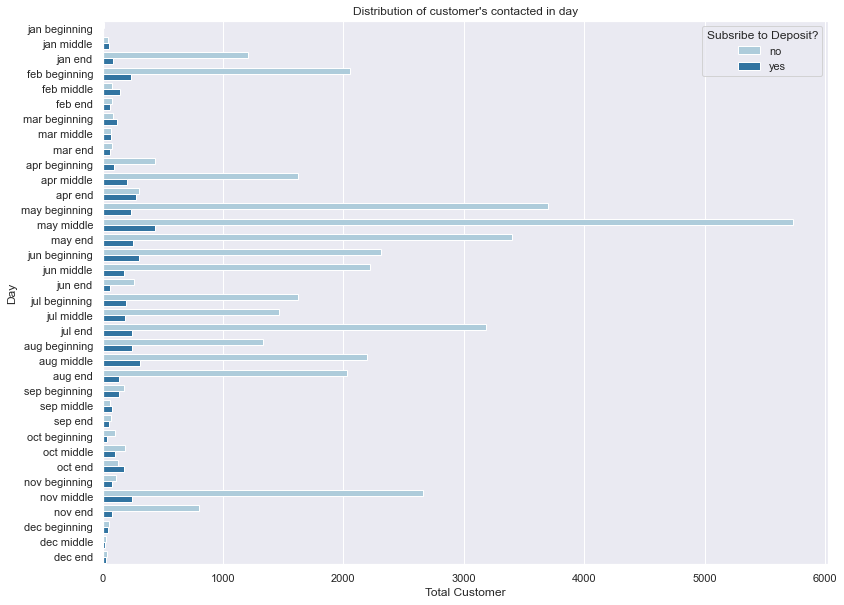

In [ ]:
plt.figure(figsize = (13, 10))
sns.barplot(data = df_sorted, x= 'count', y = 'day_of_month', hue = 'y', palette='Paired')
plt.xlabel('Total Customer')
plt.ylabel('Day')
plt.title('Distribution of customer\'s contacted in day')
plt.legend( title='Subsribe to Deposit?');

### Campaign (No of contacts performed)

Most customers have been contacted during this campaign at least 10 times.

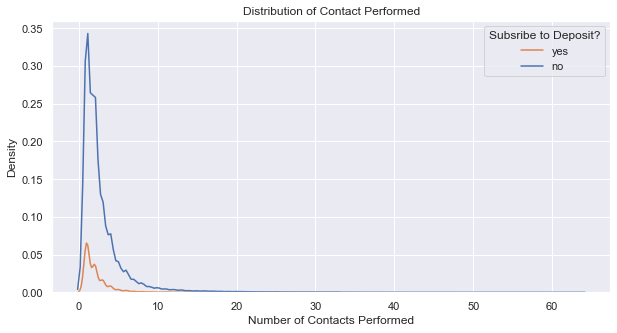

In [ ]:
ax = sns.kdeplot(data=df, x='campaign', hue='y')
plt.title('Distribution of Contact Performed')
plt.xlabel('Number of Contacts Performed',fontsize=12)
ax.legend(labels=['yes','no'], title='Subsribe to Deposit?');

After broken down to data with number of contacts at least 10, it shows that the more bank contact to do campaign for the same customers the less customers don't want to open a deposit. The most number of customers to open a deposit is when bank only contact customer once at a time and followed by twice at a times.

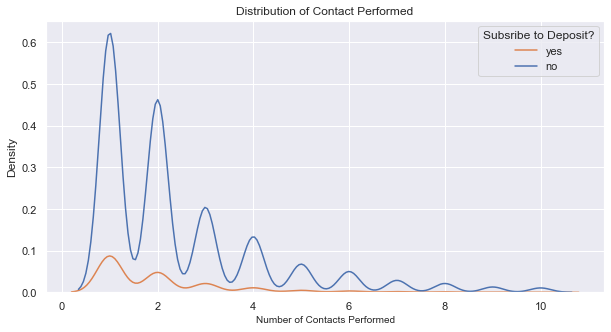

In [ ]:
df_campaign = df.loc[df['campaign']<=10]

ax = sns.kdeplot(data=df_campaign, x='campaign', hue='y')
plt.title('Distribution of Contact Performed')
plt.xlabel('Number of Contacts Performed',fontsize=10)
ax.legend(labels=['yes','no'], title='Subsribe to Deposit?');

## Customer Previous Campaign

### Pdays (Number of Days Last Contact)

Customers who have already been contacted (Pdays != -1) is around 8000 of 42000.

In [ ]:
pdays_clean = df.loc[df['pdays']!=-1]
pdays_clean.describe()

,age,balance,day,duration,campaign,pdays,previous,y_num
count,8252.000000,8252.000000,8252.000000,8252.000000,8252.000000,8252.000000,8252.000000,8252.000000
mean,40.954556,1557.323558,14.287203,4.334424,2.055986,224.544353,3.177412,0.230611
std,11.424585,3061.334465,7.918667,3.919042,1.561340,115.300549,4.561864,0.421249
min,18.000000,-1884.000000,1.000000,0.016667,1.000000,1.000000,1.000000,0.000000
25%,33.000000,167.000000,7.000000,1.883333,1.000000,133.000000,1.000000,0.000000
50%,38.000000,603.000000,14.000000,3.216667,2.000000,194.500000,2.000000,0.000000
75%,48.000000,1743.750000,20.000000,5.400000,2.000000,327.000000,4.000000,0.000000
max,93.000000,81204.000000,31.000000,36.983333,16.000000,871.000000,275.000000,1.000000


The most numbers of customers who open deposit have last contacted around 2 months (less than 100 days).

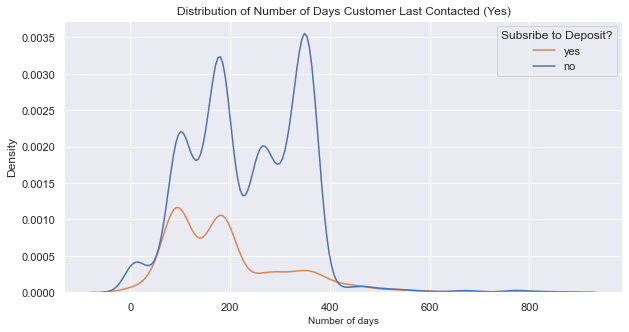

In [ ]:
sns.kdeplot(data=pdays_clean, x='pdays', hue='y')

plt.title('Distribution of Number of Days Customer Last Contacted (Yes)')
plt.xlabel('Number of days',fontsize=10)
plt.legend(labels=['yes','no'], title='Subsribe to Deposit?');

### Previous (Number of Contacts Performed)

Most customers have been contacted during previous campaign at least around 5 times.

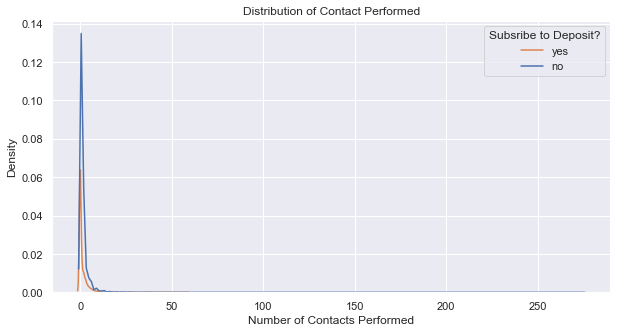

In [ ]:
ax = sns.kdeplot(data=df, x='previous', hue='y')
plt.title('Distribution of Contact Performed')
plt.xlabel('Number of Contacts Performed',fontsize=12)
ax.legend(labels=['yes','no'], title='Subsribe to Deposit?');

After broken down to data with number of contacts at least 5, it shows that previous campaign dominated with 0, means many customers never contacted before. The customer's who contacted during the previous campaign only have been contacted one to three times and the more bank contact to do campaign for the same customers the less customers don't want to open a deposit.

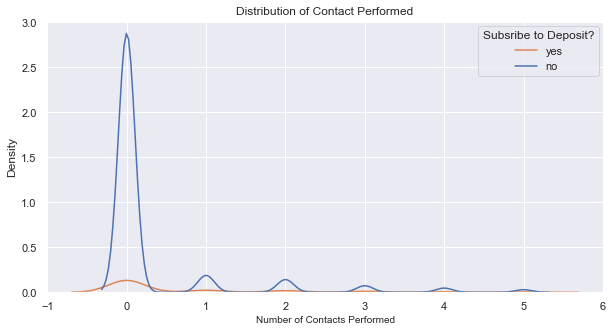

In [ ]:
ax = sns.kdeplot(data=df.loc[df['previous']<=5], x='previous', hue='y')
plt.title('Distribution of Contact Performed')
plt.xlabel('Number of Contacts Performed',fontsize=10)
ax.legend(labels=['yes','no'], title='Subsribe to Deposit?');

### Poutcome (Outcome)

`poutcome` dominated with 'unknown' values, means bank tend to contact new customers who never been exposed to another campaign. However, when viewed from proportion, customers who `success` in previous campaign tend to open an account for this campaign, means customers are satisfied with the product and more likely to subsribe to the next campaign. 

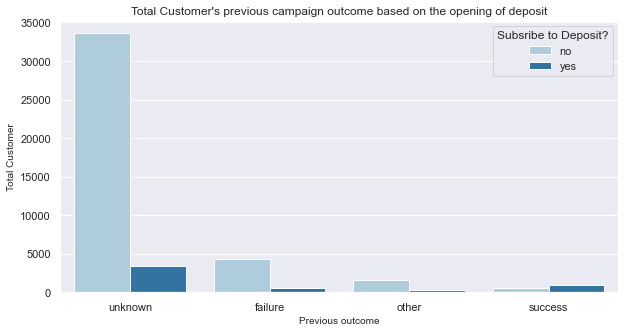

In [ ]:
sns.countplot(data=df, x='poutcome', hue = 'y', palette='Paired', order = df["poutcome"].value_counts().index)
plt.xlabel("Previous outcome", fontsize = 10)
plt.ylabel("Total Customer", fontsize = 10)
plt.legend(title='Subsribe to Deposit?')
plt.title('Total Customer\'s previous campaign outcome based on the opening of deposit');

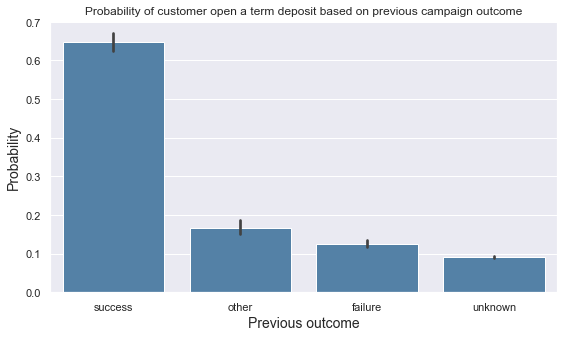

In [ ]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'poutcome', y = 'y_num', color='steelblue', order=['success', 'other', 'failure', 'unknown'])
plt.xlabel("Previous outcome", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.title('Probability of customer open a term deposit based on previous campaign outcome');